In [1]:
import pyteomics
import lxml
from pyteomics import mzml, mass
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from matplotlib import pyplot
import matplotlib
import seaborn as sns
import re
import math
import statsmodels
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import math
import statsmodels
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import mannwhitneyu
import scipy.stats as stats


In [20]:
df_pro=pd.read_csv(r'E:\\96_well\\csodiaq_results\\common_proteins.csv')
df_meta=pd.read_csv(r'E:\\96_well\\mzmine\\all_metabolites_unscaled.csv')

In [6]:
df_meta

,mz,A1,A10,A11,A12,A2,A3,A4,A5,A6,...,G11,G12,G2,G3,G4,G5,G6,G7,G8,G9
0,110.07129,16.733969,15.349143,15.053247,16.226563,15.969387,15.826995,15.486207,14.849894,14.437622,...,15.497166,16.191136,15.184953,15.332106,15.696153,16.354490,15.255987,15.792079,14.942148,14.973877
1,113.10736,12.931107,11.987264,11.713816,12.862250,11.591990,12.599448,11.751126,11.328675,12.392854,...,12.504819,12.344296,11.754052,12.347068,13.596889,13.950374,11.781360,12.039262,12.279901,12.495355
2,114.12773,13.931107,12.942515,12.794213,12.933322,13.018200,13.456354,13.389362,13.028079,12.392317,...,14.232571,13.800698,13.606174,13.970286,14.248224,14.058330,13.932953,14.469769,13.836642,14.498725
3,118.06511,14.720672,13.616549,13.947637,14.862541,14.170551,14.493730,14.134105,14.039605,13.313450,...,14.585197,13.472945,13.852334,13.799686,13.804736,14.011926,13.810772,14.696968,13.863993,14.210671
4,135.04740,11.542548,10.884171,11.353698,11.753635,11.012625,11.255619,11.301496,10.542065,10.520619,...,11.828533,11.194757,11.217352,11.216140,11.504819,11.265029,11.427313,11.266201,10.602699,10.559377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7217,1013.65083,11.431498,12.633449,12.203654,11.907642,12.380461,12.734074,12.505315,12.590353,12.238405,...,12.683653,11.660442,12.952377,11.662668,12.505812,12.942881,12.556746,12.480538,13.338736,13.271901
7218,979.50345,14.875557,14.088457,14.936178,15.134105,14.901244,14.726005,14.065079,14.717462,14.769011,...,13.569856,13.191830,13.687157,13.659550,12.892543,12.919981,13.971184,13.563911,13.608486,12.183015
7219,1009.51108,14.562123,13.126220,12.544964,13.625709,14.077650,14.653405,13.260332,13.954015,13.598053,...,12.970645,11.964341,13.679480,12.419434,11.942148,12.642729,12.659773,12.690216,12.528698,11.940681
7220,1001.57821,15.438272,15.769786,15.858661,15.827988,16.281024,15.255619,15.659829,16.865443,15.874117,...,15.771077,15.867375,16.313804,16.472469,16.130289,16.264076,16.843529,16.836149,16.468815,15.936178


In [11]:
df_meta=df_meta.drop_duplicates(subset=['mz'],keep='first')
df_meta.set_index('mz',inplace=True)
df_meta

,A1,A10,A11,A12,A2,A3,A4,A5,A6,A8,...,G11,G12,G2,G3,G4,G5,G6,G7,G8,G9
mz,,,,,,,,,,,,,,,,,,,,,
110.07129,16.733969,15.349143,15.053247,16.226563,15.969387,15.826995,15.486207,14.849894,14.437622,14.916253,...,15.497166,16.191136,15.184953,15.332106,15.696153,16.354490,15.255987,15.792079,14.942148,14.973877
113.10736,12.931107,11.987264,11.713816,12.862250,11.591990,12.599448,11.751126,11.328675,12.392854,11.520619,...,12.504819,12.344296,11.754052,12.347068,13.596889,13.950374,11.781360,12.039262,12.279901,12.495355
114.12773,13.931107,12.942515,12.794213,12.933322,13.018200,13.456354,13.389362,13.028079,12.392317,12.569856,...,14.232571,13.800698,13.606174,13.970286,14.248224,14.058330,13.932953,14.469769,13.836642,14.498725
118.06511,14.720672,13.616549,13.947637,14.862541,14.170551,14.493730,14.134105,14.039605,13.313450,13.427837,...,14.585197,13.472945,13.852334,13.799686,13.804736,14.011926,13.810772,14.696968,13.863993,14.210671
135.04740,11.542548,10.884171,11.353698,11.753635,11.012625,11.255619,11.301496,10.542065,10.520619,11.215533,...,11.828533,11.194757,11.217352,11.216140,11.504819,11.265029,11.427313,11.266201,10.602699,10.559377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013.65083,11.431498,12.633449,12.203654,11.907642,12.380461,12.734074,12.505315,12.590353,12.238405,12.096386,...,12.683653,11.660442,12.952377,11.662668,12.505812,12.942881,12.556746,12.480538,13.338736,13.271901
979.50345,14.875557,14.088457,14.936178,15.134105,14.901244,14.726005,14.065079,14.717462,14.769011,14.370415,...,13.569856,13.191830,13.687157,13.659550,12.892543,12.919981,13.971184,13.563911,13.608486,12.183015
1009.51108,14.562123,13.126220,12.544964,13.625709,14.077650,14.653405,13.260332,13.954015,13.598053,12.984418,...,12.970645,11.964341,13.679480,12.419434,11.942148,12.642729,12.659773,12.690216,12.528698,11.940681


In [12]:
dfaa = np.power(2, df_meta)
dfaa

,A1,A10,A11,A12,A2,A3,A4,A5,A6,A8,...,G11,G12,G2,G3,G4,G5,G6,G7,G8,G9
mz,,,,,,,,,,,,,,,,,,,,,
110.07129,109000.0,41740.0,34000.0,76680.0,64160.0,58130.0,45900.0,29530.0,22190.0,30920.0,...,46250.0,74820.0,37250.0,41250.0,53090.0,83790.0,39130.0,56740.0,31480.0,32180.0
113.10736,7810.0,4060.0,3359.0,7446.0,3087.0,6206.0,3447.0,2572.0,5378.0,2938.0,...,5812.0,5200.0,3454.0,5210.0,12390.0,15830.0,3520.0,4209.0,4973.0,5774.0
114.12773,15620.0,7872.0,7103.0,7822.0,8296.0,11240.0,10730.0,8353.0,5376.0,6080.0,...,19250.0,14270.0,12470.0,16050.0,19460.0,17060.0,15640.0,22690.0,14630.0,23150.0
118.06511,27000.0,12560.0,15800.0,29790.0,18440.0,23070.0,17980.0,16840.0,10180.0,11020.0,...,24580.0,11370.0,14790.0,14260.0,14310.0,16520.0,14370.0,26560.0,14910.0,18960.0
135.04740,2983.0,1890.0,2617.0,3453.0,2066.0,2445.0,2524.0,1491.0,1469.0,2378.0,...,3637.0,2344.0,2381.0,2379.0,2906.0,2461.0,2754.0,2463.0,1555.0,1509.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013.65083,2762.0,6354.0,4717.0,3842.0,5332.0,6813.0,5814.0,6167.0,4832.0,4379.0,...,6579.0,3237.0,7926.0,3242.0,5816.0,7874.0,6025.0,5715.0,10360.0,9891.0
979.50345,30060.0,17420.0,31350.0,35960.0,30600.0,27100.0,17140.0,26940.0,27920.0,21180.0,...,12160.0,9357.0,13190.0,12940.0,7604.0,7750.0,16060.0,12110.0,12490.0,4650.0
1009.51108,24190.0,8941.0,5976.0,12640.0,17290.0,25770.0,9812.0,15870.0,12400.0,8104.0,...,8027.0,3996.0,13120.0,5478.0,3935.0,6395.0,6471.0,6609.0,5909.0,3931.0


In [21]:
df_pro=df_pro.iloc[:,:83]
df_pro.set_index('Unnamed: 0',inplace=True)
df_pro

,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA1.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA2.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA3.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA4.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA5.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA6.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA8.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA9.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA10.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA11.mzXML,...,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG3.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG4.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG5.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG6.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG7.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG8.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG9.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG10.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG11.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG12.mzXML
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1/sp|Q13151|ROA0_HUMAN,1.441144e+05,1.293599e+05,1.706404e+05,1.629062e+05,1.475740e+05,1.229542e+05,1.194796e+05,1.312617e+05,1.235106e+05,1.376025e+05,...,7.948487e+04,7.789409e+04,7.709514e+04,9.342724e+04,1.116997e+05,8.378162e+04,7.151059e+04,8.037530e+04,1.001032e+05,7.765108e+04
1/sp|P25705|ATPA_HUMAN,8.915457e+05,9.051909e+05,1.009464e+06,1.002774e+06,1.033511e+06,8.360883e+05,9.578120e+05,8.907910e+05,8.371282e+05,9.252103e+05,...,5.448279e+05,5.675275e+05,5.721005e+05,6.643121e+05,7.511694e+05,5.926658e+05,4.633536e+05,4.605070e+05,6.059112e+05,4.687430e+05
1/sp|P17987|TCPA_HUMAN,7.722277e+05,9.112690e+05,9.636889e+05,1.041427e+06,1.257936e+06,7.367771e+05,8.077154e+05,7.522433e+05,7.911784e+05,8.769776e+05,...,6.463545e+05,7.117231e+05,5.785359e+05,6.961821e+05,1.003237e+06,6.504948e+05,5.534491e+05,5.110267e+05,7.587057e+05,7.368482e+05
1/sp|P06576|ATPB_HUMAN,9.082655e+05,1.094504e+06,1.221878e+06,1.084120e+06,1.058710e+06,1.025781e+06,9.808434e+05,1.011878e+06,9.910896e+05,1.103559e+06,...,5.005846e+05,6.298623e+05,5.872704e+05,6.941539e+05,6.904133e+05,6.589426e+05,5.281160e+05,5.969263e+05,7.842399e+05,6.091680e+05
1/sp|P62913|RL11_HUMAN,1.948521e+05,1.122832e+05,2.344324e+05,1.163207e+05,2.484558e+05,1.147544e+05,1.562995e+05,1.802667e+05,2.328095e+05,1.301489e+05,...,1.095979e+05,1.267054e+05,1.214290e+05,1.360161e+05,9.218631e+04,8.035412e+04,5.401722e+04,9.042837e+04,1.042689e+05,1.436257e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/sp|Q9NZL9|MAT2B_HUMAN,4.698772e+04,4.254580e+04,5.871649e+04,5.741077e+04,5.906514e+04,4.853216e+04,4.900215e+04,4.958382e+04,5.257252e+04,4.870912e+04,...,3.876218e+04,3.747386e+04,2.756995e+04,4.890974e+04,5.334758e+04,3.297185e+04,3.426302e+04,3.142844e+04,4.862499e+04,3.456012e+04
1/sp|P14174|MIF_HUMAN,3.235102e+06,2.909099e+06,4.011647e+06,3.608015e+06,3.253209e+05,3.195192e+06,2.659747e+06,3.207107e+06,2.956506e+06,2.744958e+06,...,1.245129e+06,1.589285e+06,1.355804e+06,1.590341e+06,1.779202e+06,1.432070e+06,1.361106e+06,1.353327e+06,1.714716e+06,1.345570e+06
1/sp|O00231|PSD11_HUMAN,4.853902e+04,5.101839e+04,6.530976e+04,5.828106e+04,1.020226e+05,5.314997e+04,4.731678e+04,4.770335e+04,4.399614e+04,4.969010e+04,...,2.976783e+04,2.971879e+04,3.318039e+04,3.664728e+04,4.226303e+04,4.677790e+04,3.268313e+04,3.119558e+04,4.490486e+04,2.527524e+04


In [23]:
df_pro.columns=[item.split('/')[-1].split('.')[0] for item in df_pro.columns]
df_pro.to_excel(r'E:\\project7_SMAD\\proteins_raw.xlsx')

In [6]:
new_dfpro=np.log2(df_pro)
new_dfpro

,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA1.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA2.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA3.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA4.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA5.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA6.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA8.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA9.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA10.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BA11.mzXML,...,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG3.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG4.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG5.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG6.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG7.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG8.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG9.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG10.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG11.mzXML,:/yuming/2023/20230202/New folder/20230202/mzmxl/BG12.mzXML
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1/sp|Q13151|ROA0_HUMAN,17.136855,16.981031,17.380600,17.313682,17.171079,16.907761,16.866405,17.002087,16.914275,17.070147,...,16.278393,16.249226,16.234352,16.511556,16.769266,16.354346,16.125869,16.294465,16.611128,16.244718
1/sp|P25705|ATPA_HUMAN,19.765949,19.787863,19.945158,19.935565,19.979122,19.673296,19.869383,19.764727,19.675089,19.819422,...,19.055441,19.114331,19.125909,19.341502,19.518779,19.176859,18.821754,18.812864,19.208747,18.838438
1/sp|P17987|TCPA_HUMAN,19.558667,19.797518,19.878208,19.990131,20.262627,19.490869,19.623488,19.520840,19.593644,19.742180,...,19.301966,19.440957,19.142047,19.409105,19.936231,19.311178,19.078091,18.963039,19.533181,19.491008
1/sp|P06576|ATPB_HUMAN,19.792755,20.061846,20.220668,20.048093,20.013875,19.968291,19.903663,19.948603,19.918656,20.073732,...,18.933254,19.264677,19.163665,19.404896,19.397101,19.329793,19.010495,19.187193,19.580935,19.216481
1/sp|P62913|RL11_HUMAN,17.572020,16.776782,17.838812,16.827748,17.922630,16.808190,17.253954,17.459773,17.828790,16.989804,...,16.741861,16.951118,16.889754,17.053418,16.492265,16.294084,15.721132,16.464488,16.669949,17.131954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/sp|Q9NZL9|MAT2B_HUMAN,15.519996,15.376729,15.841478,15.809034,15.850019,15.566653,15.580558,15.597582,15.682021,15.571904,...,15.242362,15.193597,14.750809,15.577834,15.703135,15.008947,15.064365,14.939783,15.569410,15.076821
1/sp|P14174|MIF_HUMAN,21.625380,21.472141,21.935763,21.782774,18.311504,21.607471,21.342858,21.612841,21.495462,21.388353,...,20.247864,20.599947,20.370718,20.600904,20.762799,20.449671,20.376348,20.368079,20.709538,20.359786
1/sp|O00231|PSD11_HUMAN,15.566857,15.638730,15.995011,15.830739,16.638529,15.697781,15.530064,15.541803,15.425089,15.600671,...,14.861467,14.859088,15.018043,15.161418,15.367109,15.513539,14.996258,14.929054,15.454584,14.625437


In [7]:
new_dfpro.columns=[item.split('/')[-1].split('.')[0] for item in new_dfpro.columns]

In [10]:
# apply standard scaler to the new dataframe 

ss = StandardScaler() 
df_ss = ss.fit_transform(new_dfpro)
dfpro_std=pd.DataFrame(df_ss,index=new_dfpro.index,columns=new_dfpro.columns)
dfpro_std

,BA1,BA2,BA3,BA4,BA5,BA6,BA8,BA9,BA10,BA11,...,BG3,BG4,BG5,BG6,BG7,BG8,BG9,BG10,BG11,BG12
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1/sp|Q13151|ROA0_HUMAN,-0.419862,-0.509531,-0.443065,-0.376354,-0.528730,-0.495093,-0.607515,-0.455514,-0.567042,-0.441701,...,-0.481138,-0.562861,-0.534626,-0.521348,-0.413663,-0.503991,-0.458139,-0.365285,-0.401619,-0.549408
1/sp|P25705|ATPA_HUMAN,1.292442,1.305703,1.200537,1.306900,1.315685,1.279125,1.335848,1.341425,1.215981,1.279351,...,1.332891,1.307595,1.343460,1.315538,1.346300,1.326967,1.291505,1.275103,1.259218,1.172761
1/sp|P17987|TCPA_HUMAN,1.157441,1.311948,1.157629,1.341931,1.501900,1.162090,1.176718,1.182790,1.163381,1.230998,...,1.493927,1.520830,1.353942,1.359419,1.613511,1.414099,1.457869,1.372922,1.466651,1.606053
1/sp|P06576|ATPB_HUMAN,1.309900,1.482894,1.377109,1.379143,1.338512,1.468378,1.358032,1.461026,1.373285,1.438550,...,1.253076,1.405747,1.367983,1.356687,1.268414,1.426175,1.413999,1.518927,1.497183,1.423773
1/sp|P62913|RL11_HUMAN,-0.136443,-0.641623,-0.149400,-0.688324,-0.035087,-0.558973,-0.356715,-0.157815,0.023582,-0.491995,...,-0.178390,-0.104637,-0.108939,-0.169631,-0.590971,-0.543082,-0.720816,-0.254539,-0.364011,0.039696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/sp|Q9NZL9|MAT2B_HUMAN,-1.472907,-1.547065,-1.429474,-1.342341,-1.396446,-1.355476,-1.439646,-1.369063,-1.362871,-1.379604,...,-1.157896,-1.252018,-1.498198,-1.127416,-1.096092,-1.376748,-1.147062,-1.247673,-1.067660,-1.324865
1/sp|P14174|MIF_HUMAN,2.503472,2.394960,2.476297,2.492811,0.220338,2.519988,2.289400,2.543517,2.391637,2.261505,...,2.111808,2.277465,2.151972,2.133002,2.142596,2.152637,2.300445,2.288111,2.218777,2.182901
1/sp|O00231|PSD11_HUMAN,-1.442387,-1.377624,-1.331076,-1.328406,-0.878526,-1.271352,-1.472322,-1.405344,-1.528806,-1.361596,...,-1.406705,-1.470400,-1.324628,-1.397706,-1.311183,-1.049420,-1.191263,-1.254661,-1.141077,-1.624574


In [11]:
# function for oneway_ANOVA analysis 
def oneway_ANOVA(result=dfpro_std):
    pval=[]
    for i in range(len(result)):
        aa=result.iloc[i,:11].tolist()
        bb=result.iloc[i,11:23].tolist()
        cc=result.iloc[i,23:35].tolist()
        dd=result.iloc[i,35:46].tolist() 
        ee=result.iloc[i,46:58].tolist()
        ff=result.iloc[i,58:70].tolist()
        gg=result.iloc[i,70:82].tolist()
        p_value=f_oneway(aa,bb,cc,dd,ee,ff,gg)[1]
        pval.append([i,p_value])
        fl = pd.DataFrame(pval)
        fl.columns = ['number', 'p_value']
    return(fl)

In [12]:
def ttest(result=dfpro_std):
    pval=[]
    for i in range(len(result)):
        aa=result.iloc[i,:11].tolist()
        bb=result.iloc[i,11:23].tolist()
        cc=result.iloc[i,23:35].tolist()
        dd=result.iloc[i,35:46].tolist() 
        ee=result.iloc[i,46:58].tolist()
        ff=result.iloc[i,58:70].tolist()
        gg=result.iloc[i,70:82].tolist() 
        p_value0=stats.ttest_ind(aa, aa, equal_var=False)[1]
        p_value1=stats.ttest_ind(aa, bb, equal_var=False)[1]
        p_value2=stats.ttest_ind(aa, cc, equal_var=False)[1]
        p_value3=stats.ttest_ind(aa, dd, equal_var=False)[1]
        p_value4=stats.ttest_ind(aa, ee, equal_var=False)[1]
        p_value5=stats.ttest_ind(aa, ff, equal_var=False)[1]
        p_value6=stats.ttest_ind(aa, gg, equal_var=False)[1]
        pval.append([p_value0,p_value1,p_value2,p_value3,p_value4,p_value5,p_value6])
    fl = pd.DataFrame(pval)
    fl.index=result.index
    fl.columns = ['pvalue0','pvalue1', 'pvalue2','pvalue3', 'pvalue4','pvalue5', 'pvalue6']
    return(fl)


In [13]:
df_pval=ttest(result=dfpro_std)

In [14]:
df_pval

,pvalue0,pvalue1,pvalue2,pvalue3,pvalue4,pvalue5,pvalue6
Unnamed: 0,,,,,,,
1/sp|Q13151|ROA0_HUMAN,1.0,0.345865,0.312198,0.005502,0.002599,0.871358,0.556412
1/sp|P25705|ATPA_HUMAN,1.0,0.636969,0.792282,0.093931,0.003115,0.033922,0.578521
1/sp|P17987|TCPA_HUMAN,1.0,0.253848,0.775502,0.124009,0.181437,0.201833,0.000209
1/sp|P06576|ATPB_HUMAN,1.0,0.024646,0.762389,0.374053,0.032991,0.989424,0.885063
1/sp|P62913|RL11_HUMAN,1.0,0.459407,0.919656,0.268116,0.187567,0.738452,0.884214
...,...,...,...,...,...,...,...
1/sp|Q9NZL9|MAT2B_HUMAN,1.0,0.153407,0.031217,0.000001,0.000037,0.000103,0.001372
1/sp|P14174|MIF_HUMAN,1.0,0.483999,0.740221,0.258461,0.265581,0.199487,0.896223
1/sp|O00231|PSD11_HUMAN,1.0,0.529334,0.444545,0.526470,0.528913,0.237422,0.649969


In [15]:
df_pval=np.log2(df_pval)
df_pval

,pvalue0,pvalue1,pvalue2,pvalue3,pvalue4,pvalue5,pvalue6
Unnamed: 0,,,,,,,
1/sp|Q13151|ROA0_HUMAN,0.0,-1.531720,-1.679466,-7.505873,-8.587995,-0.198662,-0.845775
1/sp|P25705|ATPA_HUMAN,0.0,-0.650704,-0.335914,-3.412249,-8.326331,-4.881655,-0.789558
1/sp|P17987|TCPA_HUMAN,0.0,-1.977960,-0.366797,-3.011484,-2.462462,-2.308766,-12.222806
1/sp|P06576|ATPB_HUMAN,0.0,-5.342520,-0.391402,-1.418685,-4.921784,-0.015340,-0.176148
1/sp|P62913|RL11_HUMAN,0.0,-1.122157,-0.120833,-1.899072,-2.414526,-0.437424,-0.177532
...,...,...,...,...,...,...,...
1/sp|Q9NZL9|MAT2B_HUMAN,0.0,-2.704566,-5.001507,-19.744462,-14.724140,-13.249809,-9.509912
1/sp|P14174|MIF_HUMAN,0.0,-1.046924,-0.433973,-1.951982,-1.912776,-2.325633,-0.158070
1/sp|O00231|PSD11_HUMAN,0.0,-0.917749,-1.169600,-0.925576,-0.918898,-2.074473,-0.621556


In [33]:
def getdfpro(df=df_pval):
    treatment=['CON']*450+['DMSO']*450+['DFO']*450+['TORIN2']*450+['ISRIB']*450+['A939572']*450+['MG-132']*450  
    A=df.iloc[:,0].to_frame()
    A.columns=['Value']  
    B=df.iloc[:,1].to_frame()
    B.columns=['Value']   
    C=df.iloc[:,2].to_frame()
    C.columns=['Value']
    D=df.iloc[:,3].to_frame()
    D.columns=['Value']
    E=df.iloc[:,4].to_frame()
    E.columns=['Value']
    F=df.iloc[:,5].to_frame()
    F.columns=['Value']    
    G=df.iloc[:,6].to_frame()
    G.columns=['Value']      
    made=pd.concat([A,B,C,D,E,F,G])
    made['treatment'] = treatment
    return(made)
def getdfmeta(df=df_pval):
    treatment=['CON']*7005+['DMSO']*7005+['DFO']*7005+['TORIN2']*7005+['ISRIB']*7005+['A939572']*7005+['MG-132']*7005  
    A=df.iloc[:,0].to_frame()
    A.columns=['Value']  
    B=df.iloc[:,1].to_frame()
    B.columns=['Value']   
    C=df.iloc[:,2].to_frame()
    C.columns=['Value']
    D=df.iloc[:,3].to_frame()
    D.columns=['Value']
    E=df.iloc[:,4].to_frame()
    E.columns=['Value']
    F=df.iloc[:,5].to_frame()
    F.columns=['Value']    
    G=df.iloc[:,6].to_frame()
    G.columns=['Value']      
    made=pd.concat([A,B,C,D,E,F,G])
    made['treatment'] = treatment
    return(made)

In [34]:
getdfpro(df=df_pval.abs())

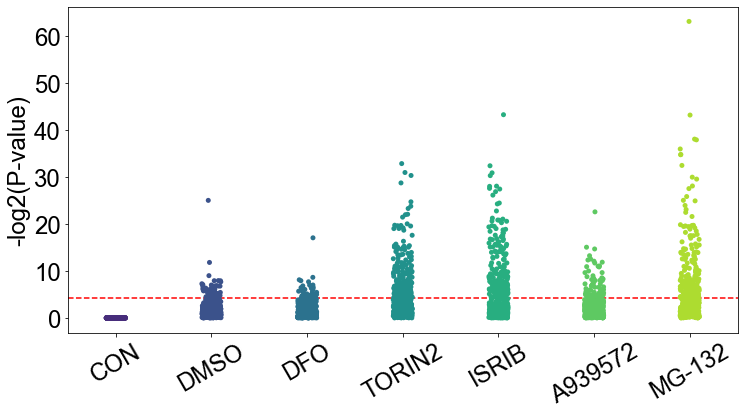

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6), edgecolor='#04253a')
plt.rcParams['font.family'] = 'Arial'

# Create beeswarm plot
sns.stripplot(x="treatment", y="Value", data=getdfpro(df=df_pval.abs()),palette='viridis',jitter=True)
plt.axhline(y=4.2, color='red', linestyle='--')
plt.xlabel('')
plt.ylabel("-log2(P-value)",fontsize=24)
plt.xticks(fontsize=24,rotation=30)
plt.yticks(fontsize=24)
plt.savefig(r'D:\\project7_SMAD\\SI\\TTEST_PRO.svg',dpi=800,bbox_inches='tight')
plt.show()

In [15]:
# make a dataframe for all p_values and corresponding protein name 

dfpro_pval=oneway_ANOVA(result=dfpro_std)
dfpro_pval['index_name']=dfpro_std.index.values.tolist()
dfpro_pval

,number,p_value,index_name
0,0,1.073709e-07,1/sp|Q13151|ROA0_HUMAN
1,1,8.468774e-03,1/sp|P25705|ATPA_HUMAN
2,2,1.092220e-05,1/sp|P17987|TCPA_HUMAN
3,3,4.412742e-03,1/sp|P06576|ATPB_HUMAN
4,4,5.765742e-01,1/sp|P62913|RL11_HUMAN
...,...,...,...
445,445,7.282941e-17,1/sp|Q9NZL9|MAT2B_HUMAN
446,446,6.628017e-01,1/sp|P14174|MIF_HUMAN
447,447,3.089690e-01,1/sp|O00231|PSD11_HUMAN
448,448,1.984754e-06,1/sp|Q00839|HNRPU_HUMAN


In [16]:
len([item for item in dfpro_pval['p_value'].tolist() if item <0.05])

306

In [17]:
FDR_res=statsmodels.stats.multitest.fdrcorrection(dfpro_pval['p_value'].tolist(), alpha=0.05, method='indep', is_sorted=False)[0]


In [18]:
# calculate the pvalues < 0.01 after FDR correction 

yuyu=[]
for item in range(len(FDR_res)):
    if FDR_res[item]== True:
        yuyu.append(item)
len(yuyu)

286

In [19]:
# locate the significant proteins from df_pval dataframe, aiming to find the protein names out 

sig_pros=dfpro_pval.loc[yuyu]
sig_pros
#sig_pros.to_excel(r'D:\\project7_SMAD\\cluster_analysis_macro_proteins\\Stardard_scaler\\sig_proteins.xlsx')

,number,p_value,index_name
0,0,1.073709e-07,1/sp|Q13151|ROA0_HUMAN
1,1,8.468774e-03,1/sp|P25705|ATPA_HUMAN
2,2,1.092220e-05,1/sp|P17987|TCPA_HUMAN
3,3,4.412742e-03,1/sp|P06576|ATPB_HUMAN
6,6,1.302602e-13,2/sp|Q14568|HS902_HUMAN/sp|P07900|HS90A_HUMAN
...,...,...,...
442,442,1.323286e-08,1/sp|P04406|G3P_HUMAN
444,444,5.908650e-03,3/sp|P61956|SUMO2_HUMAN/sp|Q6EEV6|SUMO4_HUMAN/...
445,445,7.282941e-17,1/sp|Q9NZL9|MAT2B_HUMAN
448,448,1.984754e-06,1/sp|Q00839|HNRPU_HUMAN


#PCA analysis of significant proteins 



In [20]:
dfpro_std

,BA1,BA2,BA3,BA4,BA5,BA6,BA8,BA9,BA10,BA11,...,BG3,BG4,BG5,BG6,BG7,BG8,BG9,BG10,BG11,BG12
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1/sp|Q13151|ROA0_HUMAN,-0.419862,-0.509531,-0.443065,-0.376354,-0.528730,-0.495093,-0.607515,-0.455514,-0.567042,-0.441701,...,-0.481138,-0.562861,-0.534626,-0.521348,-0.413663,-0.503991,-0.458139,-0.365285,-0.401619,-0.549408
1/sp|P25705|ATPA_HUMAN,1.292442,1.305703,1.200537,1.306900,1.315685,1.279125,1.335848,1.341425,1.215981,1.279351,...,1.332891,1.307595,1.343460,1.315538,1.346300,1.326967,1.291505,1.275103,1.259218,1.172761
1/sp|P17987|TCPA_HUMAN,1.157441,1.311948,1.157629,1.341931,1.501900,1.162090,1.176718,1.182790,1.163381,1.230998,...,1.493927,1.520830,1.353942,1.359419,1.613511,1.414099,1.457869,1.372922,1.466651,1.606053
1/sp|P06576|ATPB_HUMAN,1.309900,1.482894,1.377109,1.379143,1.338512,1.468378,1.358032,1.461026,1.373285,1.438550,...,1.253076,1.405747,1.367983,1.356687,1.268414,1.426175,1.413999,1.518927,1.497183,1.423773
1/sp|P62913|RL11_HUMAN,-0.136443,-0.641623,-0.149400,-0.688324,-0.035087,-0.558973,-0.356715,-0.157815,0.023582,-0.491995,...,-0.178390,-0.104637,-0.108939,-0.169631,-0.590971,-0.543082,-0.720816,-0.254539,-0.364011,0.039696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/sp|Q9NZL9|MAT2B_HUMAN,-1.472907,-1.547065,-1.429474,-1.342341,-1.396446,-1.355476,-1.439646,-1.369063,-1.362871,-1.379604,...,-1.157896,-1.252018,-1.498198,-1.127416,-1.096092,-1.376748,-1.147062,-1.247673,-1.067660,-1.324865
1/sp|P14174|MIF_HUMAN,2.503472,2.394960,2.476297,2.492811,0.220338,2.519988,2.289400,2.543517,2.391637,2.261505,...,2.111808,2.277465,2.151972,2.133002,2.142596,2.152637,2.300445,2.288111,2.218777,2.182901
1/sp|O00231|PSD11_HUMAN,-1.442387,-1.377624,-1.331076,-1.328406,-0.878526,-1.271352,-1.472322,-1.405344,-1.528806,-1.361596,...,-1.406705,-1.470400,-1.324628,-1.397706,-1.311183,-1.049420,-1.191263,-1.254661,-1.141077,-1.624574


# T-test analysis of metabolites of 96well plate starts from here

In [37]:
newdf_meta=df_meta.set_index('mz')
newdf_meta

,A1,A10,A11,A12,A2,A3,A4,A5,A6,A8,...,G11,G12,G2,G3,G4,G5,G6,G7,G8,G9
mz,,,,,,,,,,,,,,,,,,,,,
110.07129,16.733969,15.349143,15.053247,16.226563,15.969387,15.826995,15.486207,14.849894,14.437622,14.916253,...,15.497166,16.191136,15.184953,15.332106,15.696153,16.354490,15.255987,15.792079,14.942148,14.973877
113.10736,12.931107,11.987264,11.713816,12.862250,11.591990,12.599448,11.751126,11.328675,12.392854,11.520619,...,12.504819,12.344296,11.754052,12.347068,13.596889,13.950374,11.781360,12.039262,12.279901,12.495355
114.12773,13.931107,12.942515,12.794213,12.933322,13.018200,13.456354,13.389362,13.028079,12.392317,12.569856,...,14.232571,13.800698,13.606174,13.970286,14.248224,14.058330,13.932953,14.469769,13.836642,14.498725
118.06511,14.720672,13.616549,13.947637,14.862541,14.170551,14.493730,14.134105,14.039605,13.313450,13.427837,...,14.585197,13.472945,13.852334,13.799686,13.804736,14.011926,13.810772,14.696968,13.863993,14.210671
135.04740,11.542548,10.884171,11.353698,11.753635,11.012625,11.255619,11.301496,10.542065,10.520619,11.215533,...,11.828533,11.194757,11.217352,11.216140,11.504819,11.265029,11.427313,11.266201,10.602699,10.559377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013.65083,11.431498,12.633449,12.203654,11.907642,12.380461,12.734074,12.505315,12.590353,12.238405,12.096386,...,12.683653,11.660442,12.952377,11.662668,12.505812,12.942881,12.556746,12.480538,13.338736,13.271901
979.50345,14.875557,14.088457,14.936178,15.134105,14.901244,14.726005,14.065079,14.717462,14.769011,14.370415,...,13.569856,13.191830,13.687157,13.659550,12.892543,12.919981,13.971184,13.563911,13.608486,12.183015
1009.51108,14.562123,13.126220,12.544964,13.625709,14.077650,14.653405,13.260332,13.954015,13.598053,12.984418,...,12.970645,11.964341,13.679480,12.419434,11.942148,12.642729,12.659773,12.690216,12.528698,11.940681


In [38]:
newdf_meta.columns

Index(['A1', 'A10', 'A11', 'A12', 'A2', 'A3', 'A4', 'A5', 'A6', 'A8', 'A9',
       'B1', 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8',
       'B9', 'C1', 'C10', 'C11', 'C12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'D1', 'D10', 'D11', 'D12', 'D2', 'D3', 'D4', 'D5', 'D6',
       'D7', 'D8', 'D9', 'E1', 'E10', 'E11', 'E12', 'E2', 'E3', 'E4', 'E5',
       'E6', 'E7', 'E8', 'E9', 'F1', 'F10', 'F11', 'F12', 'F2', 'F3', 'F4',
       'F5', 'F6', 'F7', 'F8', 'F9', 'G1', 'G10', 'G11', 'G12', 'G2', 'G3',
       'G4', 'G5', 'G6', 'G7', 'G8', 'G9'],
      dtype='object')

In [39]:
newdf_meta = newdf_meta.drop('D10', axis=1)

In [40]:
newdf_meta

,A1,A10,A11,A12,A2,A3,A4,A5,A6,A8,...,G11,G12,G2,G3,G4,G5,G6,G7,G8,G9
mz,,,,,,,,,,,,,,,,,,,,,
110.07129,16.733969,15.349143,15.053247,16.226563,15.969387,15.826995,15.486207,14.849894,14.437622,14.916253,...,15.497166,16.191136,15.184953,15.332106,15.696153,16.354490,15.255987,15.792079,14.942148,14.973877
113.10736,12.931107,11.987264,11.713816,12.862250,11.591990,12.599448,11.751126,11.328675,12.392854,11.520619,...,12.504819,12.344296,11.754052,12.347068,13.596889,13.950374,11.781360,12.039262,12.279901,12.495355
114.12773,13.931107,12.942515,12.794213,12.933322,13.018200,13.456354,13.389362,13.028079,12.392317,12.569856,...,14.232571,13.800698,13.606174,13.970286,14.248224,14.058330,13.932953,14.469769,13.836642,14.498725
118.06511,14.720672,13.616549,13.947637,14.862541,14.170551,14.493730,14.134105,14.039605,13.313450,13.427837,...,14.585197,13.472945,13.852334,13.799686,13.804736,14.011926,13.810772,14.696968,13.863993,14.210671
135.04740,11.542548,10.884171,11.353698,11.753635,11.012625,11.255619,11.301496,10.542065,10.520619,11.215533,...,11.828533,11.194757,11.217352,11.216140,11.504819,11.265029,11.427313,11.266201,10.602699,10.559377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013.65083,11.431498,12.633449,12.203654,11.907642,12.380461,12.734074,12.505315,12.590353,12.238405,12.096386,...,12.683653,11.660442,12.952377,11.662668,12.505812,12.942881,12.556746,12.480538,13.338736,13.271901
979.50345,14.875557,14.088457,14.936178,15.134105,14.901244,14.726005,14.065079,14.717462,14.769011,14.370415,...,13.569856,13.191830,13.687157,13.659550,12.892543,12.919981,13.971184,13.563911,13.608486,12.183015
1009.51108,14.562123,13.126220,12.544964,13.625709,14.077650,14.653405,13.260332,13.954015,13.598053,12.984418,...,12.970645,11.964341,13.679480,12.419434,11.942148,12.642729,12.659773,12.690216,12.528698,11.940681


In [41]:
# apply standard scaler to the new dataframe of metabolites 

ss = StandardScaler() 
df_sss = ss.fit_transform(newdf_meta)
df_std_meta=pd.DataFrame(df_sss,index=newdf_meta.index,columns=newdf_meta.columns)
df_std_meta

,A1,A10,A11,A12,A2,A3,A4,A5,A6,A8,...,G11,G12,G2,G3,G4,G5,G6,G7,G8,G9
mz,,,,,,,,,,,,,,,,,,,,,
110.07129,1.400043,0.773277,0.683492,1.293884,1.132347,0.959908,0.779304,0.509977,0.390783,0.625685,...,0.768355,1.259194,0.658291,0.797666,0.871608,1.347103,0.673441,0.991675,0.488610,0.512805
113.10736,-0.618000,-0.976992,-1.052908,-0.453513,-1.104391,-0.718837,-1.163923,-1.252782,-0.610508,-1.049983,...,-0.883710,-0.773016,-1.138826,-0.731224,-0.255039,0.081928,-1.183300,-1.014491,-0.902498,-0.810509
114.12773,-0.087336,-0.479667,-0.491136,-0.416599,-0.375634,-0.273134,-0.311608,-0.402042,-0.610771,-0.532208,...,0.070176,-0.003628,-0.168679,0.100163,0.094524,0.138740,-0.033550,0.284800,-0.089051,0.259115
118.06511,0.331658,-0.128750,0.108609,0.585422,0.213188,0.266436,0.075854,0.104338,-0.159707,-0.108814,...,0.264860,-0.176773,-0.039739,0.012785,-0.143490,0.114320,-0.098840,0.406255,-0.074760,0.105320
135.04740,-1.354859,-1.551287,-1.240159,-1.029319,-1.400431,-1.417804,-1.397849,-1.646567,-1.527313,-1.200535,...,-1.257086,-1.380295,-1.419951,-1.310468,-1.377825,-1.331245,-1.372492,-1.427751,-1.778888,-1.844151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013.65083,-1.413789,-0.640574,-0.798208,-0.949329,-0.701502,-0.648814,-0.771546,-0.621172,-0.686140,-0.765855,...,-0.784977,-1.134283,-0.511139,-1.081762,-0.840606,-0.448269,-0.768956,-0.778595,-0.349223,-0.395901
979.50345,0.413850,0.116936,0.622620,0.726470,0.586553,0.387249,0.039943,0.443681,0.553059,0.356327,...,-0.295707,-0.325281,-0.126259,-0.058991,-0.633052,-0.460321,-0.013121,-0.199450,-0.208270,-0.977271
1009.51108,0.247522,-0.384026,-0.620737,-0.056979,0.165718,0.349488,-0.378738,0.061491,-0.020341,-0.327631,...,-0.626529,-0.973739,-0.130281,-0.694159,-1.143117,-0.606225,-0.713901,-0.666506,-0.772493,-1.106656


In [42]:
df_pval_meta=ttest(result=df_std_meta)

In [43]:
log2_df_pval_meta=np.log2(df_pval_meta)

In [44]:
log2_df_pval_meta

,pvalue0,pvalue1,pvalue2,pvalue3,pvalue4,pvalue5,pvalue6
mz,,,,,,,
110.07129,0.0,-9.907137,-1.244952,-0.237444,-4.390036,-0.073972,-0.078058
113.10736,0.0,-2.227506,-2.676737,-1.588922,-0.138986,-1.941951,-2.766474
114.12773,0.0,-0.788704,-0.285215,-20.604624,-12.082960,-9.302334,-21.158264
118.06511,0.0,-2.608629,-0.815009,-1.979202,-2.616520,-5.671025,-1.495792
135.04740,0.0,-0.854303,-2.499041,-1.787422,-1.641338,-0.055917,-2.610487
...,...,...,...,...,...,...,...
1013.65083,0.0,-4.830274,-4.170058,-8.072310,-6.667783,-0.515454,-0.536055
979.50345,0.0,-2.457398,-2.482982,-20.074986,-17.442700,-9.413920,-17.886578
1009.51108,0.0,-1.121547,-3.843644,-18.191622,-12.181108,-6.486840,-10.501517


In [45]:
getdfmeta(df=log2_df_pval_meta.abs())

,Value,treatment
mz,,
110.07129,0.000000,CON
113.10736,0.000000,CON
114.12773,0.000000,CON
118.06511,0.000000,CON
135.04740,0.000000,CON
...,...,...
1013.65083,0.536055,MG-132
979.50345,17.886578,MG-132
1009.51108,10.501517,MG-132


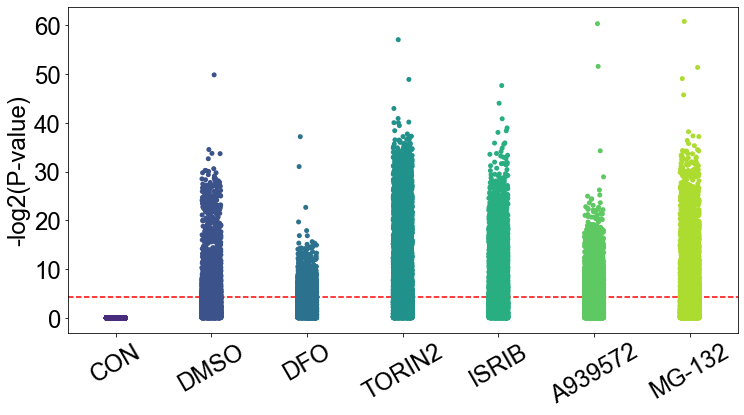

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6), edgecolor='#04253a')
plt.rcParams['font.family'] = 'Arial'

# Create beeswarm plot
sns.stripplot(x="treatment", y="Value", data=getdfmeta(df=log2_df_pval_meta.abs()),palette='viridis',jitter=True)
plt.axhline(y=4.2, color='red', linestyle='--')
plt.xlabel('')
plt.ylabel("-log2(P-value)",fontsize=24)
plt.xticks(fontsize=24,rotation=30)
plt.yticks(fontsize=24)
plt.savefig(r'D:\\project7_SMAD\\SI\\TTEST_META.svg',dpi=800,bbox_inches='tight')
plt.show()